# Beers example

In [1]:
import numpy as np
import pandas
from IPython.core.display import display

import raha

In [2]:
datasets = []

for i in range(10):
    from raha import analysis_utilities
    app_1 = raha.Detection()
    app_2 = raha.Correction()

    # How many tuples would you label?
    app_1.LABELING_BUDGET = 20
    app_2.LABELING_BUDGET = 0

    # Would you like to see the logs?
    app_1.VERBOSE = False
    app_2.VERBOSE = False

    dataset_dictionary = {
            "name": "beers",
            "path": "datasets/beers/dirty.csv",
            "clean_path": "datasets/beers/clean.csv"
        }
    d = app_1.initialize_dataset(dataset_dictionary)

    app_1.run_strategies(d)
    app_1.generate_features(d)
    app_1.build_clusters(d)

    while len(d.labeled_tuples) < app_1.LABELING_BUDGET:
        app_1.sample_tuple(d)
        if d.has_ground_truth:
            app_1.label_with_ground_truth(d)

    app_1.propagate_labels(d)
    app_1.predict_labels(d)

    app_2.initialize_models(d)
    app_2.initialize_dataset(d)
    for si in d.labeled_tuples:
        d.sampled_tuple = si
        app_2.update_models(d)
        app_2.generate_features(d)
        app_2.predict_corrections(d)

    print(f"Run {i} done")

    datasets.append(d)

I just load strategies' results as they have already been run on the dataset!


Run 0 done


I just load strategies' results as they have already been run on the dataset!


Run 1 done


I just load strategies' results as they have already been run on the dataset!


Run 2 done


I just load strategies' results as they have already been run on the dataset!


Run 3 done


I just load strategies' results as they have already been run on the dataset!


Run 4 done


I just load strategies' results as they have already been run on the dataset!


Run 5 done


I just load strategies' results as they have already been run on the dataset!


Run 6 done


I just load strategies' results as they have already been run on the dataset!


Run 7 done


I just load strategies' results as they have already been run on the dataset!


Run 8 done


I just load strategies' results as they have already been run on the dataset!


Run 9 done


In [3]:
evaluation_df = pandas.DataFrame(columns=["Task", "Precision", "Recall", "F1 Score"])

for d in datasets:
    edp, edr, edf = d.get_data_cleaning_evaluation(d.detected_cells)[:3]
    ecp, ecr, ecf = d.get_data_cleaning_evaluation(d.corrected_cells)[-3:]

    evaluation_df = evaluation_df.append({"Task": "Error Detection (Raha)", "Precision": edp,
                                          "Recall": edr, "F1 Score": edf}, ignore_index=True)
    evaluation_df = evaluation_df.append({"Task": "Error Correction (Baran)", "Precision": ecp,
                                          "Recall": ecr, "F1 Score": ecf}, ignore_index=True)
display(evaluation_df)

evaluation_df.groupby("Task").agg(["mean", "std", "min", "max"])

/home/adrian/source/MA/raha/raha/dataset.py:123: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if correction_dictionary[cell] == actual_errors[cell]:


,Task,Precision,Recall,F1 Score
0,Error Detection (Raha),0.997941,1.000000,0.998969
1,Error Correction (Baran),0.931881,0.931453,0.931667
2,Error Detection (Raha),0.998398,1.000000,0.999198
3,Error Correction (Baran),0.976471,0.970426,0.973439
4,Error Detection (Raha),0.998398,1.000000,0.999198
5,Error Correction (Baran),0.968867,0.948877,0.958768
6,Error Detection (Raha),0.998398,1.000000,0.999198
7,Error Correction (Baran),0.959779,0.957359,0.958568
8,Error Detection (Raha),0.998398,1.000000,0.999198
9,Error Correction (Baran),0.984112,0.965612,0.974774


Precision                                  Recall  \
                              mean       std       min       max      mean   
Task                                                                         
Error Correction (Baran)  0.952737  0.029085  0.889436  0.984112  0.937529   
Error Detection (Raha)    0.996428  0.006339  0.978466  1.000000  0.998418   

                                                        F1 Score            \
                               std       min       max      mean       std   
Task                                                                         
Error Correction (Baran)  0.042530  0.828061  0.972031  0.944989  0.035650   
Error Detection (Raha)    0.005002  0.984182  1.000000  0.997404  0.003667   

                                              
                               min       max  
Task                                          
Error Correction (Baran)  0.857652  0.974825  
Error Detection (Raha)    0.989116  0.999198

## Analyze the alternative repairs

In [4]:
alternative_count_list = []

for d in datasets:
    number_of_repairs = len(d.correction_collection)
    number_of_repairs_hist = dict()

    for cell_repairs in d.correction_collection.values():
        num = len(cell_repairs)
        number_of_repairs_hist[num] = number_of_repairs_hist.get(num, 0) + 1

    hist = [0] * (max(number_of_repairs_hist.keys()) + 1)
    for num, count in number_of_repairs_hist.items():
        hist[num] = count

    alternative_count_list.append(number_of_repairs_hist)

    #print(f"Histogram of the number of alternative repairs: {list(enumerate(hist))}")

max_alternatives = max(len(h) for h in alternative_count_list)

alternative_count_df = pandas.DataFrame(columns=list(range(max_alternatives + 1)))

for hist in alternative_count_list:
    alternative_count_df = alternative_count_df.append(hist, ignore_index=True)

alternative_count_df.drop(0,axis=1,inplace=True)
alternative_count_df = alternative_count_df.fillna(0)
alternative_count_df

,1,2,3,4,5,6,7,8,10
0,2397.0,1707.0,132.0,53.0,17.0,6.0,8.0,2.0,0.0
1,3676.0,450.0,134.0,33.0,2.0,0.0,0.0,0.0,0.0
2,3674.0,443.0,74.0,37.0,5.0,1.0,2.0,0.0,0.0
3,2236.0,1816.0,158.0,66.0,25.0,7.0,2.0,0.0,0.0
4,3368.0,805.0,41.0,14.0,9.0,0.0,0.0,0.0,0.0
5,3560.0,704.0,23.0,7.0,4.0,0.0,0.0,0.0,0.0
6,2539.0,1398.0,72.0,12.0,4.0,0.0,0.0,0.0,0.0
7,2843.0,1231.0,100.0,46.0,22.0,5.0,0.0,1.0,1.0
8,3213.0,912.0,95.0,33.0,8.0,5.0,1.0,0.0,0.0
9,3528.0,689.0,50.0,6.0,1.0,1.0,0.0,0.0,0.0


In [5]:
mean_number_of_repairs = (alternative_count_df * np.arange(1,10,1)).sum(axis=1) / alternative_count_df.sum(axis=1)
mean_number_of_repairs.agg(["mean", "std", "min", "max"])

mean    1.316448
std     0.150148
min     1.174457
max     1.574710
dtype: float64

In [6]:
more_than_one = alternative_count_df.loc[:, alternative_count_df.columns[1:]].sum(axis=1) / alternative_count_df.sum(axis=1)
more_than_one.agg(["mean", "std", "min", "max"])

mean    0.270204
std     0.127846
min     0.132672
max     0.481206
dtype: float64

In [7]:
print("Mean number of cells with x predicted alternatives in 10 runs")
mean_count_series = alternative_count_df.mean()
mean_count_series

Mean number of cells with x predicted alternatives in 10 runs


1     3103.4
2     1015.5
3       87.9
4       30.7
5        9.7
6        2.5
7        1.3
8        0.3
10       0.1
dtype: float64

In [64]:
correct_repairs = datasets[0].get_actual_errors_dictionary()

infos = []

for d in datasets:
    for cell in d.correction_collection:
        if cell in correct_repairs:
            alternative_confidences = [value for alt, value in d.correction_collection[cell].items() if alt != d.corrected_cells[cell]]
            infos.append([d.corrected_cells[cell] == correct_repairs[cell],
                          len(d.correction_collection[cell]),
                          correct_repairs[cell] in d.correction_collection[cell],
                          d.correction_confidences[cell],
                          tuple(alternative_confidences)])

alternative_correct_df = pandas.DataFrame(infos, columns=["correct", "alternatives", "correct_contained", "chosen_confidence", "alternative_confidences"])
alternative_correct_df

,correct,alternatives,correct_contained,chosen_confidence,alternative_confidences
0,True,2,True,1.0,"(0.5011903582351955,)"
1,True,1,True,1.0,()
2,True,2,True,1.0,"(0.5,)"
3,True,2,True,1.0,"(0.5004558037657229,)"
4,True,2,True,1.0,"(0.5,)"
...,...,...,...,...,...
42491,True,1,True,1.0,()
42492,True,1,True,1.0,()
42493,True,1,True,1.0,()
42494,True,1,True,1.0,()


In [72]:
(alternative_correct_df["alternatives"] > 1).sum() / len(alternative_correct_df.index)

0.27009600903614456

In [73]:
alternative_correct_df["correct"].sum() / len(alternative_correct_df.index)

0.9530544051204819

In [76]:
print((alternative_correct_df.loc[~alternative_correct_df["correct"], "alternatives"] > 1).sum())
(alternative_correct_df.loc[~alternative_correct_df["correct"], "alternatives"] > 1).sum() / (~alternative_correct_df["correct"]).sum()

1273


0.638095238095238

In [77]:
print((alternative_correct_df.loc[alternative_correct_df["correct"], "alternatives"] > 1).sum())
(alternative_correct_df.loc[alternative_correct_df["correct"], "alternatives"] > 1).sum() / (alternative_correct_df["correct"]).sum()

10205


0.2519690871830325

In [78]:
0.64 * 0.05 / 0.27

0.11851851851851851

In [79]:
1273 / (1273 + 10205)

0.110907823662659

In [80]:
(~alternative_correct_df["correct"] & alternative_correct_df["correct_contained"]).sum() / (~alternative_correct_df["correct"]).sum()

0.37543859649122807

In [89]:
collection = []
correct_repair_probs = []
incorrect_repair_probs = []
other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]
    #print(f"Number of incorrectly repaired cells: {len(error_repaired_cells)}")

    correct_repair_available = 0
    correct_repair_highest = 0

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell].keys():
            correct_repair_available += 1
            other_repairs = d.correction_collection[cell].copy()
            other_repairs.pop(d.corrected_cells[cell], None)
            other_repairs.pop(correct_repairs[cell], None)
            if d.correction_collection[cell][correct_repairs[cell]] > max(list(other_repairs.values()) + [0]):
                correct_repair_highest += 1

    #print(f"Number of incorrectly repaired cells, where the correct repair is among the alternative repairs: {correct_repair_available}")

    collection.append((len(error_repaired_cells),correct_repair_available, correct_repair_highest))

    for cell in error_repaired_cells:
        if correct_repairs[cell] in d.correction_collection[cell]:
            correct_repair_probs.append(d.correction_collection[cell][correct_repairs[cell]])
            incorrect_repair_probs.append(d.correction_confidences[cell])
            other_repair_probs.append([prob for val, prob in d.correction_collection[cell].items()
                                       if val not in [correct_repairs[cell], d.corrected_cells[cell]]])

repairable_df = pandas.DataFrame(collection, columns=["errors","repairs","highest"])
repairable_df["repair_percentage"] = repairable_df["repairs"] / repairable_df["errors"]
repairable_df["highest_percentage"] = repairable_df["highest"] / repairable_df["errors"]
repairable_df[["repair_percentage", "highest_percentage"]].agg(["mean", "std", "min", "max"])

,repair_percentage,highest_percentage
mean,0.309808,0.285062
std,0.213265,0.186010
min,0.098039,0.098039
max,0.677966,0.624506


In [13]:
print(pandas.Series(correct_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(correct_repair_probs,np.linspace(0.5,1.0,101))

mean    0.834035
std     0.212772
min     0.500000
max     1.000000
dtype: float64


(array([123,   5,   4,   0,   2,   4,   0,   2,   6,   1,   5,   0,   1,
          2,   5,   2,   6,  12,   2,   2,   5,  15,   4,   6,   4,   5,
          7,   3,   3,   0,   0,   1,   1,   0,   5,   2,   0,   0,   0,
          0,   0,   0,   0,   0,  31,   2,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   7,   0,   0,   0,   0,   2,   4,   2,
          1,   1,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   2,   0,   0,   0,   0,   0,   0,   0,   1,
          1,   3,   0,   0,   0,   0,   0,   5, 441]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

In [15]:
print(pandas.Series(incorrect_repair_probs).agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs,np.linspace(0.5,1.0,101))

mean    0.82207
std     0.23063
min     0.50000
max     1.00000
dtype: float64


(array([162,   1,   9,   5,  10,   0,   8,  35,   1,   2,   2,   8,   4,
          4,   1,   0,   1,   7,   0,   1,   0,   0,   5,   1,   0,   1,
          0,   0,   0,   0,   0,   0,   2,   1,   5,   0,   0,   0,   0,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   1,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          1,   0,   2,   0,   0,   0,   0,   0,   0,   2,   0,   1,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0, 464]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

In [16]:
flat_others = [value for sublist in other_repair_probs for value in sublist]

print(pandas.Series(flat_others).agg(["mean", "std", "min", "max"]))

np.histogram(flat_others,np.linspace(0.5, 1.0, 101))

mean    0.672561
std     0.213569
min     0.500504
max     1.000000
dtype: float64


(array([25, 25, 22, 10, 20,  4,  3,  9,  4,  1,  1,  4,  0,  7,  4,  6,  1,
         1,  2,  0,  1,  1,  1,  0, 12,  0,  0,  0,  0,  0,  0,  0,  0,  2,
         0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 69]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        0.77 , 0.775, 0.78 , 0.785, 0.79 , 0.795, 0.8  , 0.805, 0.81 ,
        0.815, 0.82 , 0.825, 0.83 , 0.835, 0.84 , 0.8

In [82]:
correct_s = pandas.Series(correct_repair_probs)
incorrect_s = pandas.Series(incorrect_repair_probs)
max_other_s = pandas.Series(max(other + [0]) for other in other_repair_probs)

print(len(correct_s))

print((correct_s > max_other_s).sum() / len(correct_s))
print((correct_s == max_other_s).sum() / len(correct_s))
print((correct_s > incorrect_s).sum() / len(correct_s))
print((correct_s == incorrect_s).sum() / len(correct_s))
print((correct_s >= incorrect_s).sum() / len(correct_s))
print(((correct_s > incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s == incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) & (correct_s > max_other_s)).sum() / len(correct_s))
print(((correct_s >= incorrect_s) | (max_other_s >= incorrect_s)).sum() / len(correct_s))

abs(correct_s - incorrect_s).describe()

749
0.910547396528705
0.06542056074766354
0.2910547396528705
0.6061415220293725
0.897196261682243
0.2817089452603471
0.5420560747663551
0.8237650200267023
0.8985313751668892


count    749.000000
mean       0.044793
std        0.102440
min        0.000000
25%        0.000000
50%        0.000000
75%        0.019516
max        0.498658
dtype: float64

In [85]:
other_count = pandas.Series(len(other) for other in other_repair_probs)
print((other_count == 0).sum() / len(other_count))

print(((correct_s > max_other_s) & (other_count > 0)).sum() / (other_count > 0).sum())

0.8130841121495327
0.5214285714285715


In [44]:
incorrect_repair_probs_full = []
max_other_repair_probs = []

for d in datasets:
    error_repaired_cells = [cell for cell, correction in d.corrected_cells.items() if cell in correct_repairs and correction != correct_repairs[cell]]

    for cell in error_repaired_cells:
        incorrect_repair_probs_full.append(d.correction_confidences[cell])
        max_other_repair_probs.append(max([prob for val, prob in d.correction_collection[cell].items()
                                   if val != d.corrected_cells[cell]] + [0]))

In [48]:
print(len(incorrect_repair_probs_full))
print(len(max_other_repair_probs))

incorrect_repair_probs_full = pandas.Series(incorrect_repair_probs_full)
max_other_repair_probs = pandas.Series(max_other_repair_probs)

print((max_other_repair_probs >= incorrect_repair_probs_full).sum() / len(max_other_repair_probs))

print(incorrect_repair_probs_full.agg(["mean", "std", "min", "max"]))

np.histogram(incorrect_repair_probs_full, np.linspace(0.5,1.0,101))

1995
1995
0.3779448621553885
mean    0.757092
std     0.227161
min     0.500000
max     1.000000
dtype: float64


(array([308,  47,  98,  39,  62,  13,  16,  99,  20,  11,  22,  30,  12,
         19,  15,  10,  11,  58,   7,   1,  11,   2,  22,   4,  24,   2,
          1,   2,   1,   8,   0,   0,  11,   2,   6,   7,   2,   0,   0,
          2,   1,  18,   0,   0,   0,   0,   0,   0,   0,   0,   1,   8,
          0,   1,   7,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          8,   0,  18,   0,   0,   1,   2,   0,   0,   2,  18,  14,   0,
          3,   0,   0,   2,   0,   0,   0,   0,   0,   0,   5,   0,  10,
          0,   0,   0,   3,   2,   4,   3,   3, 856]),
 array([0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535, 0.54 ,
        0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 , 0.585,
        0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625, 0.63 ,
        0.635, 0.64 , 0.645, 0.65 , 0.655, 0.66 , 0.665, 0.67 , 0.675,
        0.68 , 0.685, 0.69 , 0.695, 0.7  , 0.705, 0.71 , 0.715, 0.72 ,
        0.725, 0.73 , 0.735, 0.74 , 0.745, 0.75 , 0.755, 0.76 , 0.765,
        

## Analyze confidence vs error probability

In [70]:
import importlib
from raha import analysis_utilities
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.ion()

In [1]:
importlib.reload(analysis_utilities)

NameError: name 'importlib' is not defined

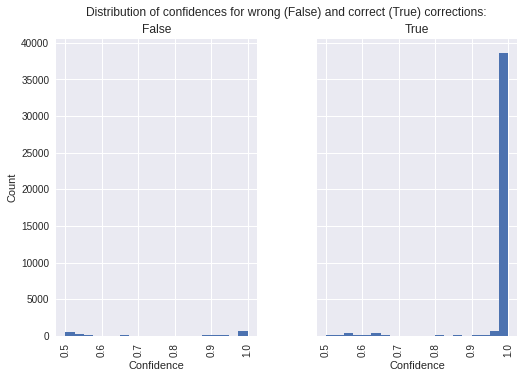

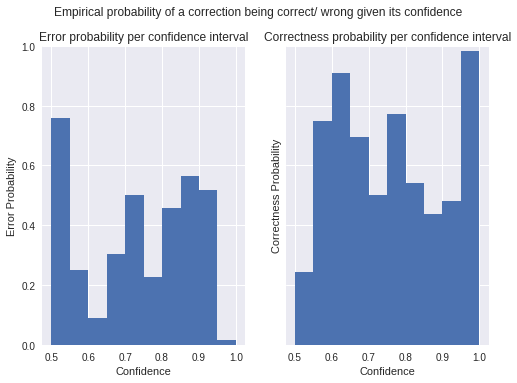

In [75]:
r_p_dfs = []

for d in datasets:

    r_p_dfs.append(analysis_utilities.get_correction_confidence_df(d))

r_p_df = pandas.concat(r_p_dfs)

display(analysis_utilities.correction_confidence_distributions(r_p_df))
display(analysis_utilities.correction_correctness_by_confidence(r_p_df, number_of_bins=10))

## Analyze detection confidence vs error probability

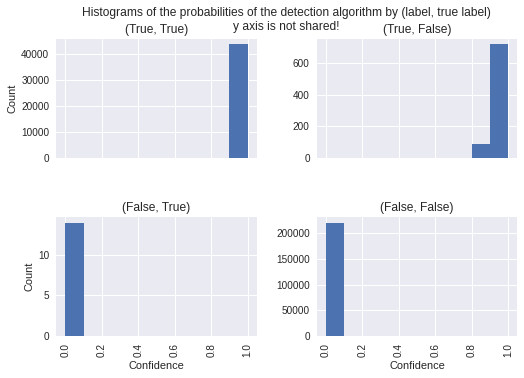

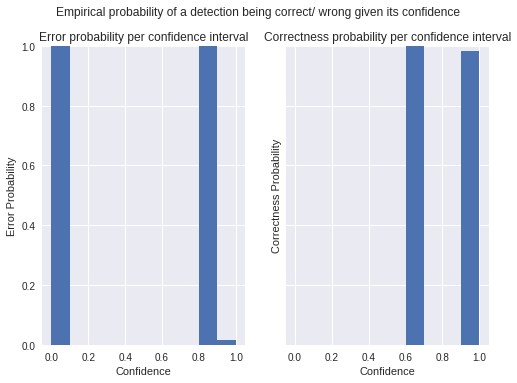

In [88]:
evaluation_dfs = []

for d in datasets:
    df = analysis_utilities.get_detection_evaluation_df(d)
    evaluation_dfs.append(df)
    #display(df)
    #display(df.value_counts(subset=["detected", "truth"]))
    #display(analysis_utilities.detection_evaluation(df))
    #display(analysis_utilities.detection_correctness_by_confidence(df,number_of_bins=10))

df = pandas.concat(evaluation_dfs)
display(analysis_utilities.detection_evaluation(df))
display(analysis_utilities.detection_correctness_by_confidence(df))


In [97]:
1 - ((df["p"] < 0.05) | (df["p"] > 0.95)).sum() / len(df.index)

0.000694077706525853